In [44]:
from IPython.display import Image
Image(url='http://img08.deviantart.net/fb0c/i/2013/082/7/5/004_charmander_by_pklucario-d5z1g9v.png')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#warning
import warnings
warnings.filterwarnings('ignore')

#Load dataset

In [ ]:
df=pd.read_csv("/content/pokedex.csv")

In [ ]:
df.head()

,Image,Index,Name,Type 1,Type 2,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
0,images/1.png,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,images/2.png,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,images/3.png,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,images/4.png,3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,images/5.png,4,Charmander,Fire,NaN,309,39,52,43,60,50,65


In [ ]:
df.shape

(1215, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Image     1215 non-null   object
 1   Index     1215 non-null   int64 
 2   Name      1215 non-null   object
 3   Type 1    1215 non-null   object
 4   Type 2    669 non-null    object
 5   Total     1215 non-null   int64 
 6   HP        1215 non-null   int64 
 7   Attack    1215 non-null   int64 
 8   Defense   1215 non-null   int64 
 9   SP. Atk.  1215 non-null   int64 
 10  SP. Def   1215 non-null   int64 
 11  Speed     1215 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 114.0+ KB


#EDA(Explotary Data Analysis):-

In [ ]:
df.describe()

,Index,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
count,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000
mean,501.735802,443.104527,71.244444,81.152263,75.007407,73.224691,72.441152,70.034568
std,298.979081,121.193406,26.927819,32.037134,30.740999,32.757152,27.578188,30.161298
min,1.000000,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,240.500000,332.000000,52.000000,57.000000,52.000000,50.000000,51.000000,45.000000
50%,495.000000,465.000000,70.000000,80.000000,70.000000,65.000000,70.000000,68.000000
75%,753.500000,521.000000,85.000000,100.000000,91.000000,95.000000,90.000000,91.000000
max,1025.000000,1125.000000,255.000000,190.000000,250.000000,194.000000,250.000000,200.000000


In [ ]:
df.columns

Index(['Image', 'Index', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack',
       'Defense', 'SP. Atk.', 'SP. Def', 'Speed'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Image,0
Index,0
Name,0
Type 1,0
Type 2,546
Total,0
HP,0
Attack,0
Defense,0
SP. Atk.,0


In [ ]:
df['Type 2'].unique()

array(['Poison', nan, 'Flying', 'Dragon', 'Normal', 'Psychic', 'Steel',
       'Ground', 'Fairy', 'Grass', 'Rock', 'Fighting', 'Electric', 'Ice',
       'Dark', 'Ghost', 'Fire', 'Water', 'Bug'], dtype=object)

In [ ]:
#filled the missing values in None
df['Type 2'].fillna('None',inplace=True)

In [ ]:
df.isnull().sum().any()

False

In [ ]:
#duplicated data
df.duplicated().sum().any()

False

In [ ]:
#drop the image column
df.drop(columns={'Image','Index'},axis=1,inplace=True)

In [ ]:
df.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'SP. Atk.', 'SP. Def', 'Speed'],
      dtype='object')

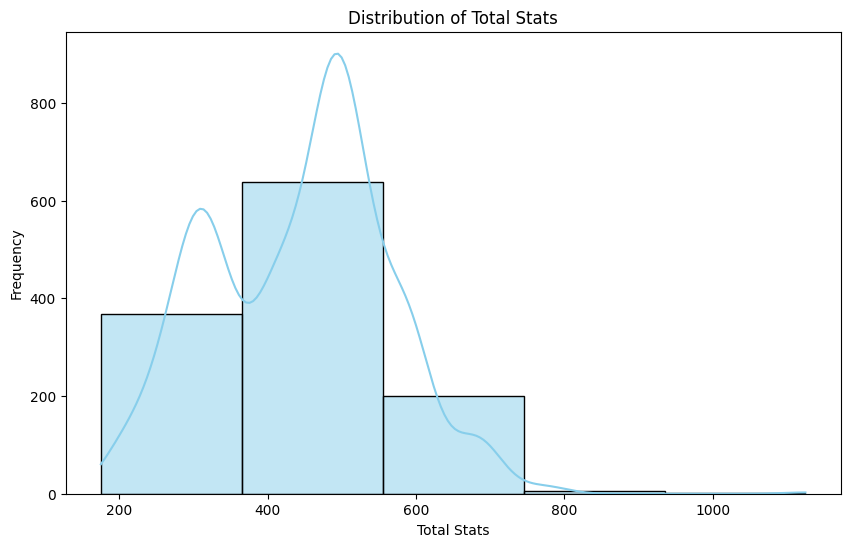

In [ ]:
# Distribution of Total Stats
plt.figure(figsize=(10, 6))
sns.histplot(df['Total'], kde=True, color='skyblue', bins=5)
plt.title('Distribution of Total Stats')
plt.xlabel('Total Stats')
plt.ylabel('Frequency')
plt.show()

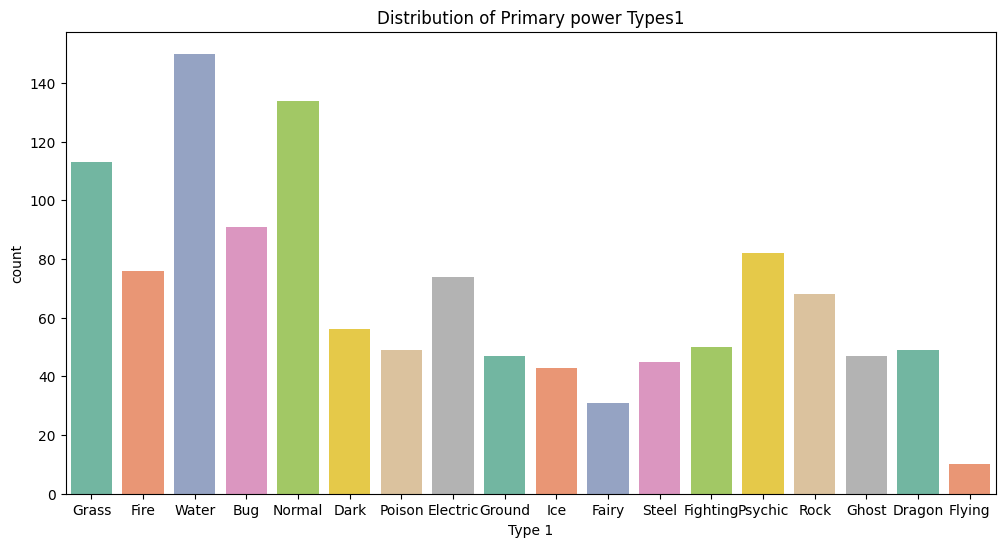

In [ ]:
#  Distribution of Types (Type 1 )
plt.figure(figsize=(12, 6))
sns.countplot(x='Type 1', data=df, palette='Set2')
plt.title('Distribution of Primary power Types1')
plt.show()

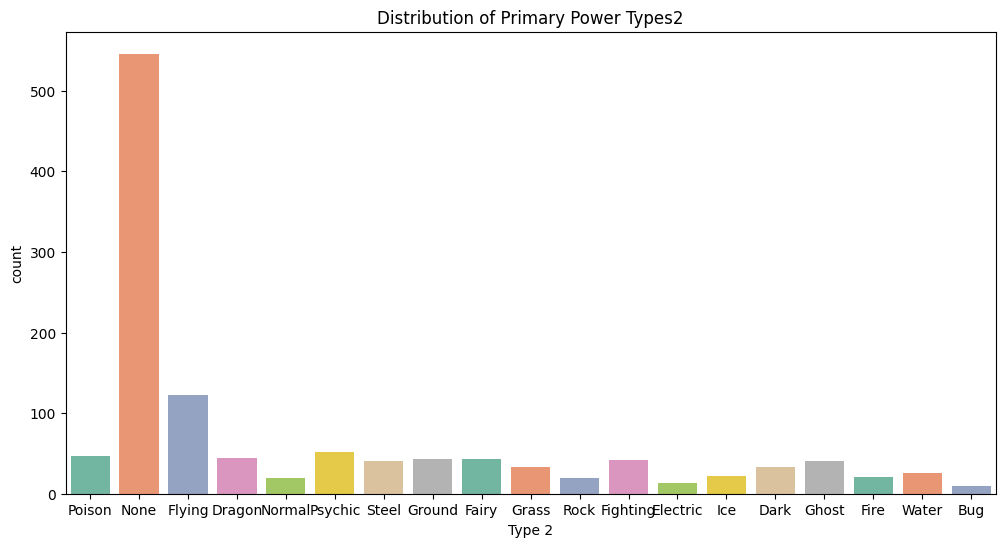

In [ ]:
# 2. Distribution of Types (Type 2)
plt.figure(figsize=(12, 6))
sns.countplot(x='Type 2', data=df, palette='Set2')
plt.title('Distribution of Primary Power Types2')
plt.show()

#correlation features

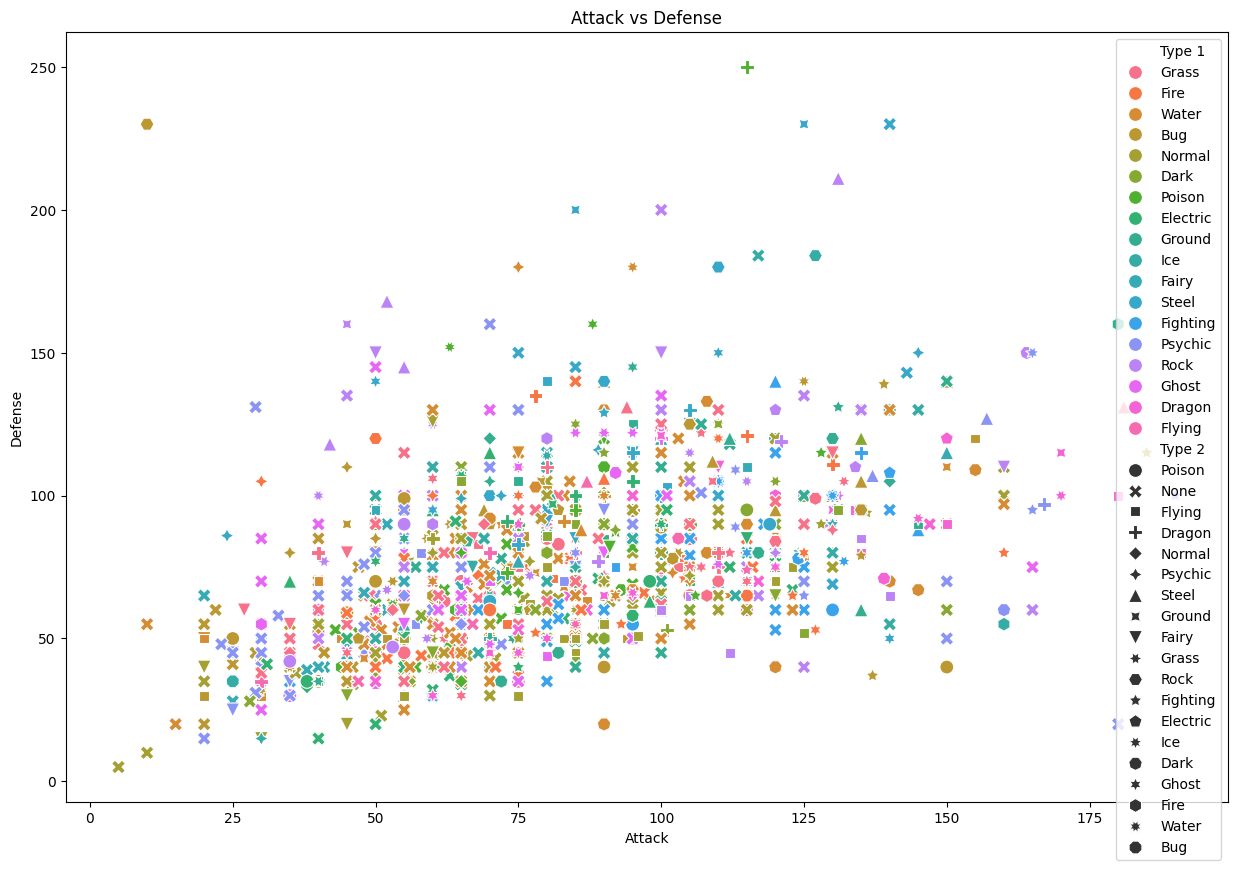

In [ ]:
# Scatter plot of Attack vs Defense
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df, x='Attack', y='Defense', hue='Type 1', style='Type 2', s=100)
plt.title('Attack vs Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend()
plt.show()

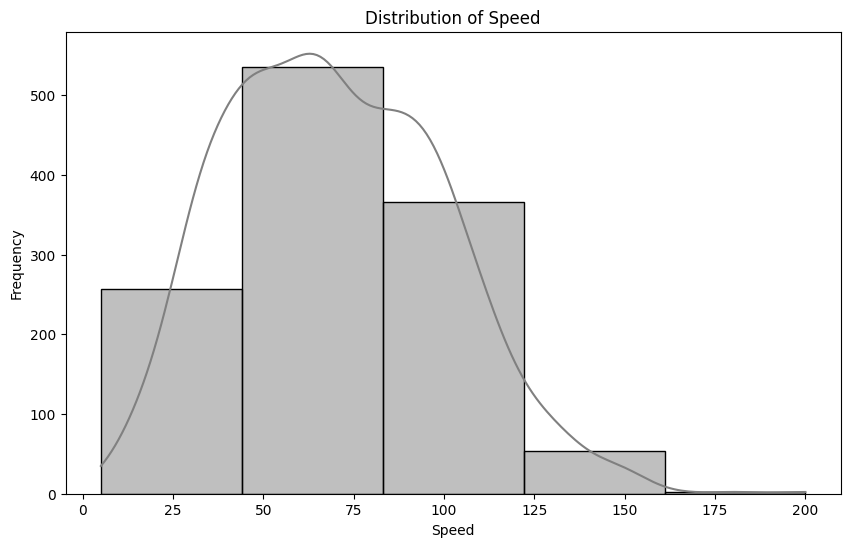

In [ ]:
#distribution of speed
plt.figure(figsize=(10, 6))
sns.histplot(df['Speed'], kde=True, color='grey', bins=5)
plt.title('Distribution of Speed')
plt.xlabel('Speed')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#total number of pokemon unique name in dataset
df['Name'].nunique()

1215

In [ ]:
df.columns

Index(['Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'SP. Atk.', 'SP. Def', 'Speed'],
      dtype='object')

Text(0.5, 1.0, 'Pokemon count per primary type')

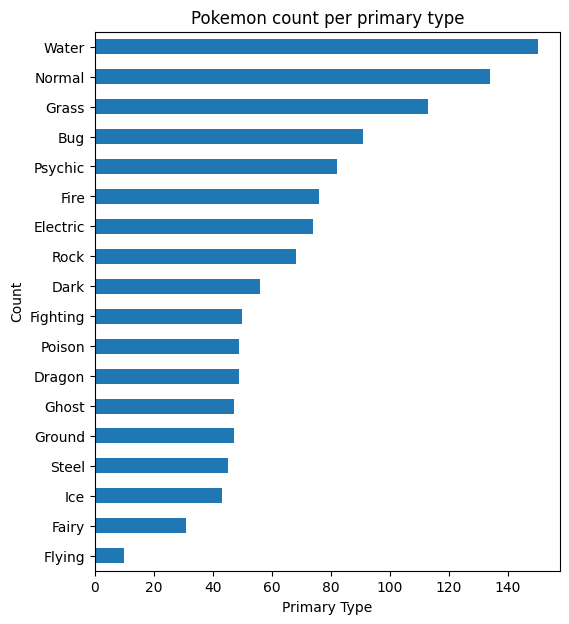

In [ ]:
type_count_df =df['Type 1'].value_counts()
type_count_df.plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Primary Type')
plt.ylabel('Count')
plt.title('Pokemon count per primary type')

Text(0.5, 1.0, 'Pokemon count per primary type')

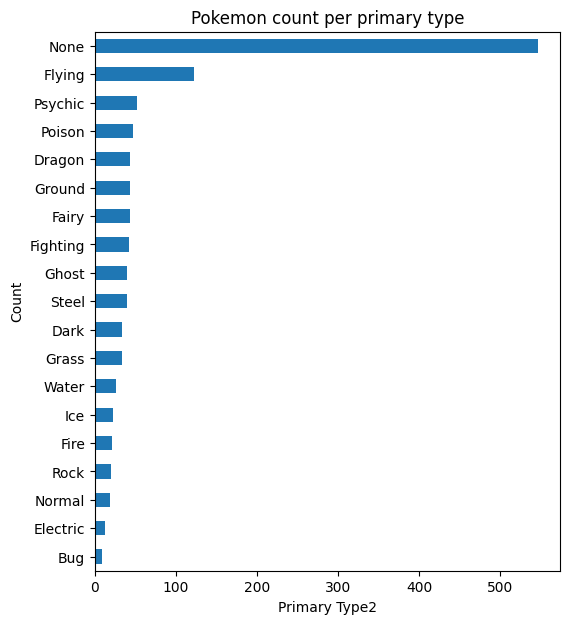

In [ ]:
type_count_df =df['Type 2'].value_counts()
type_count_df.plot.barh(figsize=(6,7)).invert_yaxis()
plt.xlabel('Primary Type2')
plt.ylabel('Count')
plt.title('Pokemon count per primary type')

In [37]:
npoke_total = pd.concat([df['Name'],df['Total']], axis=1)


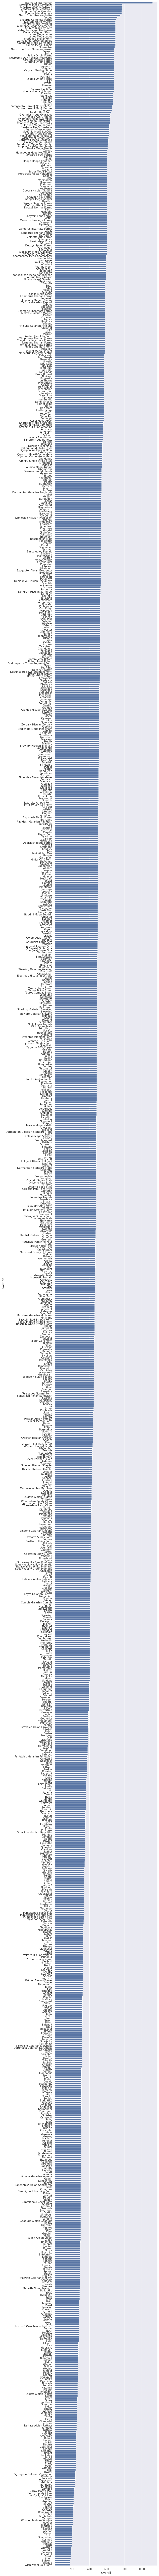

In [40]:
sns.set()
plt.figure(figsize=(8,200))
ax = sns.barplot(x='Total',y='Name',data=npoke_total.sort_values(by='Total', ascending=False))
ax.set(xlabel='Overall', ylabel='Pokemon')
plt.show()

In [ ]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,SP. Atk.,SP. Def,Speed
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,Venusaur Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80
4,Charmander,Fire,None,309,39,52,43,60,50,65


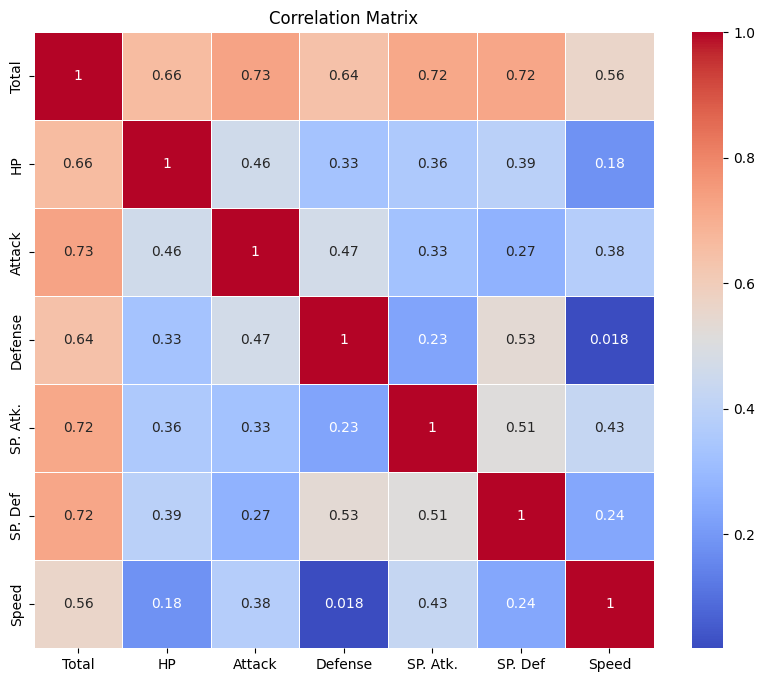

In [ ]:
#Correlation Analysis
plt.figure(figsize=(10, 8))
correlation_matrix = df[['Total', 'HP', 'Attack', 'Defense', 'SP. Atk.', 'SP. Def', 'Speed']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()